# MIssing Vlaues - Feature Engineering

1. Missing completely at random = MCAR

   there is absolutely no relationship between the missing and any other values 

In [22]:
import pandas as pd
import numpy as np

In [23]:
df =pd.read_csv("titanic_train.csv")

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#missing particalar values (rows)

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. #### Missing data not at random (MNAR) :systematic missiong values
There is absolutely some relationship between the missing and any other values 


In [27]:
#cabin and age r the example of (MNAR)

In [28]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [34]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
##find percnetage of null values
df['cabin_null'].mean()

0.7710437710437711

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [39]:
df.groupby(['Survived'])['cabin_null'].mean()


Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Missing At Random (MAR)
Men ---- hide their salary .
Womne --- hide their age

# ALL the techniques of handling missing values


### 1.Mean/ Median / Mode replacement 
### 2.Random Sample Imputation
### 3.Capturing NAN values with a new feature
### 4.End of Dsitrubution imputation
### 5.Arbitrary imputation 
### 6.Frequent categories imputations


# Mean Median Mode imputation

#### * when should we apply
#### * Mean / Median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [42]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [43]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [45]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [48]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [49]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [66]:
median =df.Age.median()
median

28.0

In [67]:
impute_nan(df,"Age",median)

In [68]:
df.head(20)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [69]:
print(df['Age'].std())

14.526497332334044


In [70]:
print(df['Age_median'].std())

13.019696550973194


In [71]:
import matplotlib.pyplot as plt

In [72]:
import seaborn as sns

/home/fastai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

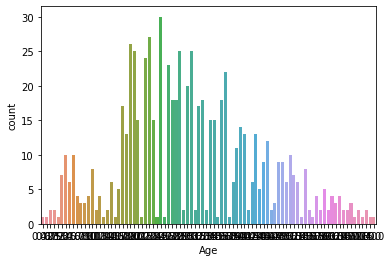

In [73]:
sns.countplot(df['Age'],)

/home/fastai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_median', ylabel='count'>

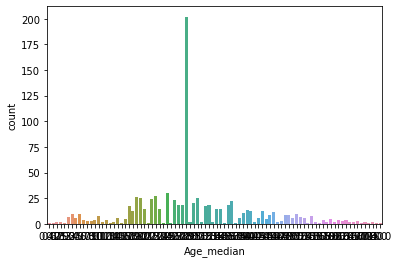

In [74]:
sns.countplot(df['Age_median'])

<Figure size 432x288 with 0 Axes>

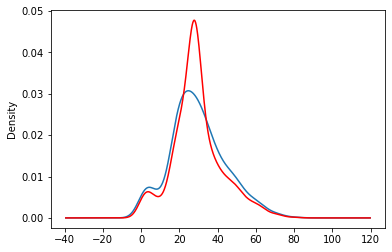

In [81]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()


### Advantages and Disadvantage of mean median imputation 

#### Advantages
* easy to compute Nan value 
* Faster way to obtian the complete dataset

#### Disadvantages

* replacing with nan value with mean medians are will reduce model performmance
* overfitting
* change or distortion in the original variance
